### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Leer la imagen
En este caso se hace un cambio de espacio de color para trabajar en el espacio HSV.

(-0.5, 625.5, 625.5, -0.5)

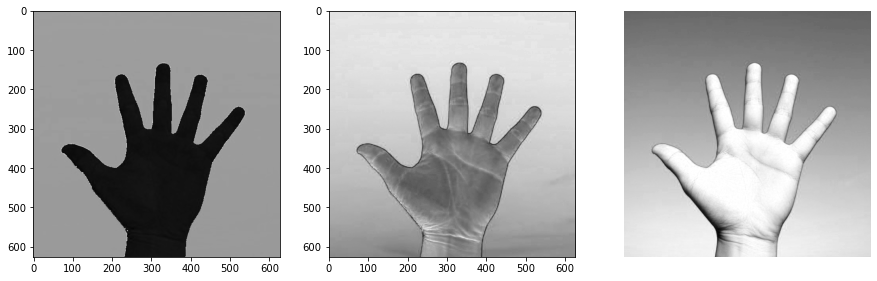

In [14]:
#Leer imagen
im = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/mano.jpg")

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
img_original=cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

img=img_original[:,:,0]
img_1=img_original[:,:,1]
img_2=img_original[:,:,2]

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_1, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_2, cmap='gray')
plt.axis('off')

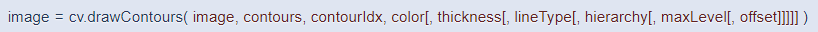

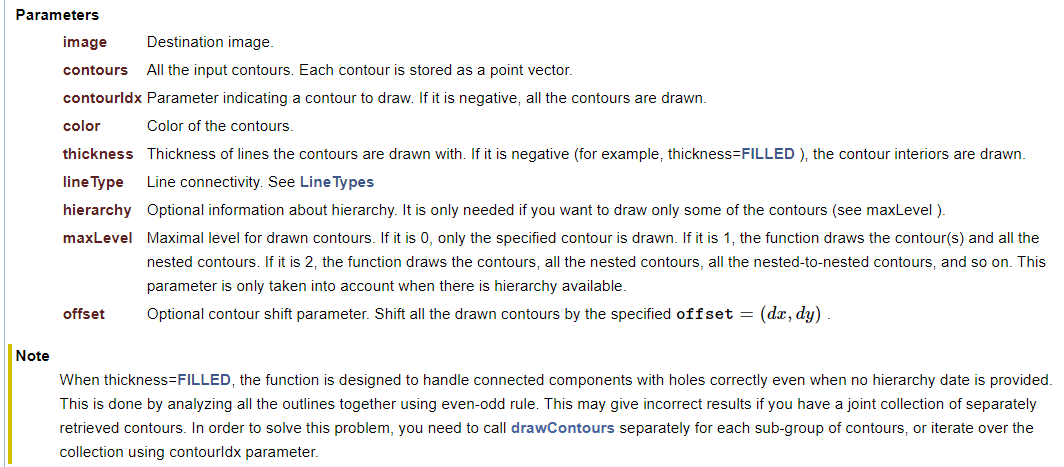

#### Obtener contorno de la mano

(4,)


(-0.5, 625.5, 625.5, -0.5)

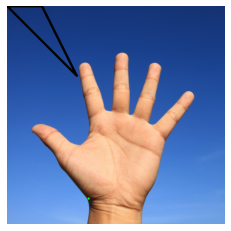

In [18]:
# Se binariza la imagen. Retorna: umbral, imagen_binaria
ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
#contours, hierarchy = cv2.findContours(thresh,1, 2) # Se detectan los contornos
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # Se detectan los contornos

print (np.shape(contours))


#Dibujar los contornos
#img2 = cv2.drawContours(im, contours, -1, (0,255,0), 10)
img2 = cv2.drawContours(im, contours, 3, (0,255,0), 3)

plt.imshow(img2)
plt.axis('off')

In [4]:
print(len(contours[0]), len(contours[1]), len(contours[2]), len(contours[3]))
print(np.shape(contours))
print(type(contours))
print(len(contours))

2226 4 10 6
(4,)
<class 'list'>
4


(-0.5, 625.5, 625.5, -0.5)

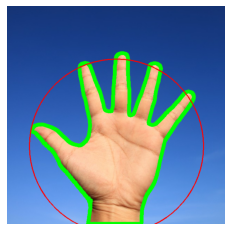

In [5]:
# Recopilacion del procedimiento para identificar el centroide del contorno de mayor area
areas = [cv2.contourArea(contorno) for contorno in contours]
contorno_de_interes = contours[areas.index(max(areas))]
momentos = cv2.moments(contorno_de_interes)
# Centroide
cx = int(momentos['m10']/momentos['m00'])
cy = int(momentos['m01']/momentos['m00'])
imagen_con_contorno = cv2.circle(img2,(cx,cy), 250, (255,0,0), 2) # Imagen, coordenadas, radio, color, espesor
plt.imshow(imagen_con_contorno)
plt.axis('off')

### Momentos de imagen
Un momento de la imagen es un cierto promedio ponderado particular (llamado momento) de las intensidades o distribuciones de los píxeles de la imagen, o una función de tales momentos, generalmente elegido para tener alguna propiedad o interpretación atractiva.

Los momentos de imagen son útiles para describir objetos después de la segmentación . Las propiedades simples de la imagen que se encuentran a través de los momentos de la imagen incluyen área (o intensidad total), su centroide e información sobre su orientación.

Para una función continua $2D$ $f(x,y)$, el momento (a veces llamado "momento bruto") de orden ($p+q$) se define como:
$$M_{pq}=\int_{-\infty }^{-\infty}\int_{-\infty }^{-\infty}x^{p}y^{q}f(x,y)dxdy$$
Adoptados a una función discreta tendríamos que:
$$M_{ij}=\sum_{x} \sum_{y} x^{i} y^{j} I(x,y)$$
Así el momento $M_{00}$ tendría la siguiente forma:
$$M_{00}=\sum_{x} \sum_{y} I(x,y)$$
O el momento bruto $M_{10}$:
$$M_{10}=\sum_{x} \sum_{y} x\,I(x,y)$$

In [71]:
#Momentos de imagen
cnt=contours[3]
M = cv2.moments(cnt)
print(M)

{'m00': 4.0, 'm10': 936.0, 'm01': 2210.0, 'm20': 219025.0, 'm11': 517140.0, 'm02': 1221026.6666666665, 'm30': 51252318.0, 'm21': 121011312.5, 'm12': 285720240.0, 'm03': 674619075.0, 'mu20': 1.0, 'mu11': 0.0, 'mu02': 1.6666666665114462, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 3.632158041000366e-08, 'mu03': 2.384185791015625e-07, 'nu20': 0.0625, 'nu11': 0.0, 'nu02': 0.10416666665696539, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 1.1350493878126144e-09, 'nu03': 7.450580596923828e-09}


In [72]:
#Aréa del objeto
area = cv2.contourArea(cnt)
print (int(area))
print (int(M['m00']))

4
4


(-0.5, 625.5, 625.5, -0.5)

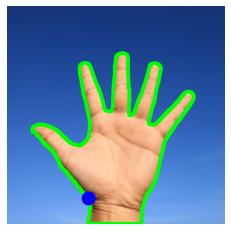

In [74]:
#Centroide del objeto
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

img2 = cv2.circle(img2,(cx,cy), 20, (0,0,255), -1)
plt.imshow(img2)
plt.axis('off')

### Perímetro
También se llama longitud de arco. Se puede encontrar usando la función cv2.arcLength () . El segundo argumento especifica si la forma es un contorno cerrado (si se pasa True), o simplemente una curva.

In [21]:
#Perimetro del contorno
perimetro = cv2.arcLength(cnt,True)
print(perimetro)

2530.8611612319946


(-0.5, 625.5, 625.5, -0.5)

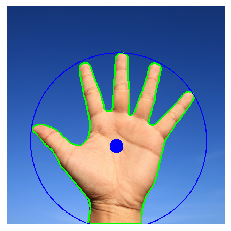

In [22]:
#Circulo mínimo de inclusión
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img2 = cv2.circle(img2,center,radius,(0,0,255),2)

plt.imshow(img2)
plt.axis('off')